In [10]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from tensorflow import math
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from keras.utils.vis_utils import plot_model
import pandas as pd

In [17]:
winedf = pd.read_csv('winequalityN.csv')
winedf.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [21]:
winedf = winedf.dropna()
winedf.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [22]:
winedf.rename(columns={
    'type': 'wines'
},
inplace=True
              
)
              inplace=True)

In [31]:
winedf.loc[winedf['wines'] == 'white', 'wines'] = 1
winedf.loc[winedf['wines'] == 'red', 'wines'] = 0
# wine_data.loc[wine_data["white_wine"] == "white", "white_wine"] = 1
# wine_data.loc[wine_data["white_wine"] == "red", "white_wine"] = 0
# wine_data

In [34]:
winedf.loc[winedf['quality'] <= 6, 'quality'] = 0
winedf.loc[winedf['quality'] >= 7, 'quality'] = 1

In [35]:
winedf

,wines,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,0
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,0
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,0
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,0
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [38]:
winedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   wines                 6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 706.9+ KB


In [39]:
# normalizing_data
normalize_data = make_column_transformer((
MinMaxScaler(), ["fixed acidity", "volatile acidity", "citric acid",
     "residual sugar", "chlorides", "free sulfur dioxide",
     "total sulfur dioxide", "density", "pH", "sulphates",
     "alcohol"]
 
)
)

In [40]:
normalize_data

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['fixed acidity', 'volatile acidity',
                                  'citric acid', 'residual sugar', 'chlorides',
                                  'free sulfur dioxide', 'total sulfur dioxide',
                                  'density', 'pH', 'sulphates', 'alcohol'])])

In [46]:
X = winedf.drop('quality', axis=1)
y = winedf['quality']


,wines,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
random_state=66)

In [48]:
normalize_data.fit(X_train)

# Transform training and test data with normalization 
# (MinMaxScalar) 
X_train_normal = normalize_data.transform(X_train)
X_test_normal = normalize_data.transform(X_test)

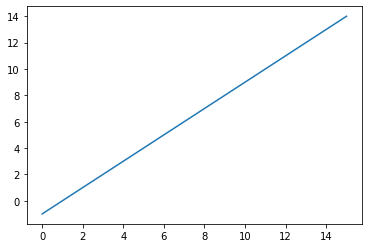

In [57]:
sample_model = tf.cast(tf.range(-1, 15), tf.float16)
plt.plot(sample_model)
# samp_ten = tf.cast(tf.range(-1, 15), tf.float32)
# plt.plot(samp_ten)

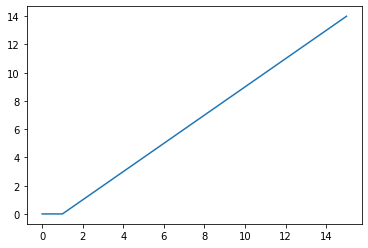

In [58]:
def relu(X):
    return tf.maximum(0, X)

plt.plot(relu(sample_model))

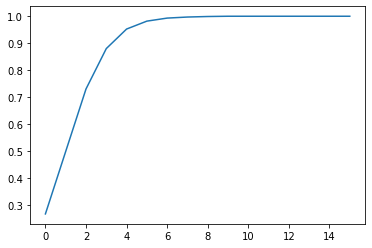

In [60]:
def sigmoid(X):
    return 1/(1+tf.exp(-X))

plt.plot(sigmoid(sample_model))

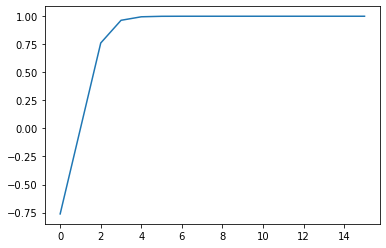

In [62]:
def tanh(x):
    return tf.tanh(x)

plt.plot(tanh(sample_model))

In [76]:
tf.random.set_seed(46)

model = Sequential([
    layers.Dense(4, activation=keras.activations.relu),
    layers.Dense(4, activation=keras.activations.relu),
    layers.Dense(1, activation=keras.activations.sigmoid)
]
)

model.compile(
    optimizer = keras.optimizers.Adam(),
    loss = keras.losses.binary_crossentropy,
    metrics=['accuracy']
    
)

In [77]:
history = model.fit(X_train_normal, y_train, epochs=50)

Epoch 1/50
162/162 [==============================] - 2s 3ms/step - loss: 0.5692 - accuracy: 0.7843
Epoch 2/50
162/162 [==============================] - 0s 2ms/step - loss: 0.4814 - accuracy: 0.8056
Epoch 3/50
162/162 [==============================] - 0s 2ms/step - loss: 0.4611 - accuracy: 0.8056
Epoch 4/50
162/162 [==============================] - 0s 2ms/step - loss: 0.4431 - accuracy: 0.8056
Epoch 5/50
162/162 [==============================] - 0s 2ms/step - loss: 0.4279 - accuracy: 0.8056
Epoch 6/50
162/162 [==============================] - 0s 2ms/step - loss: 0.4173 - accuracy: 0.8056
Epoch 7/50
162/162 [==============================] - 0s 2ms/step - loss: 0.4080 - accuracy: 0.8151
Epoch 8/50
162/162 [==============================] - 0s 2ms/step - loss: 0.4028 - accuracy: 0.8190
Epoch 9/50
162/162 [==============================] - 0s 2ms/step - loss: 0.3990 - accuracy: 0.8172
Epoch 10/50
162/162 [==============================] - 0s 2ms/step - loss: 0.3965 - accuracy: 0.8182

In [78]:
model.evaluate(X_train_normal, y_train)

162/162 [==============================] - 1s 2ms/step - loss: 0.3754 - accuracy: 0.8190


[0.3753531277179718, 0.8189555406570435]

<AxesSubplot:>

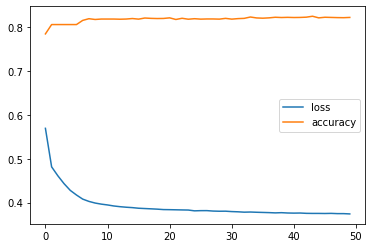

In [79]:
pd.DataFrame(history.history).plot()

<AxesSubplot:>

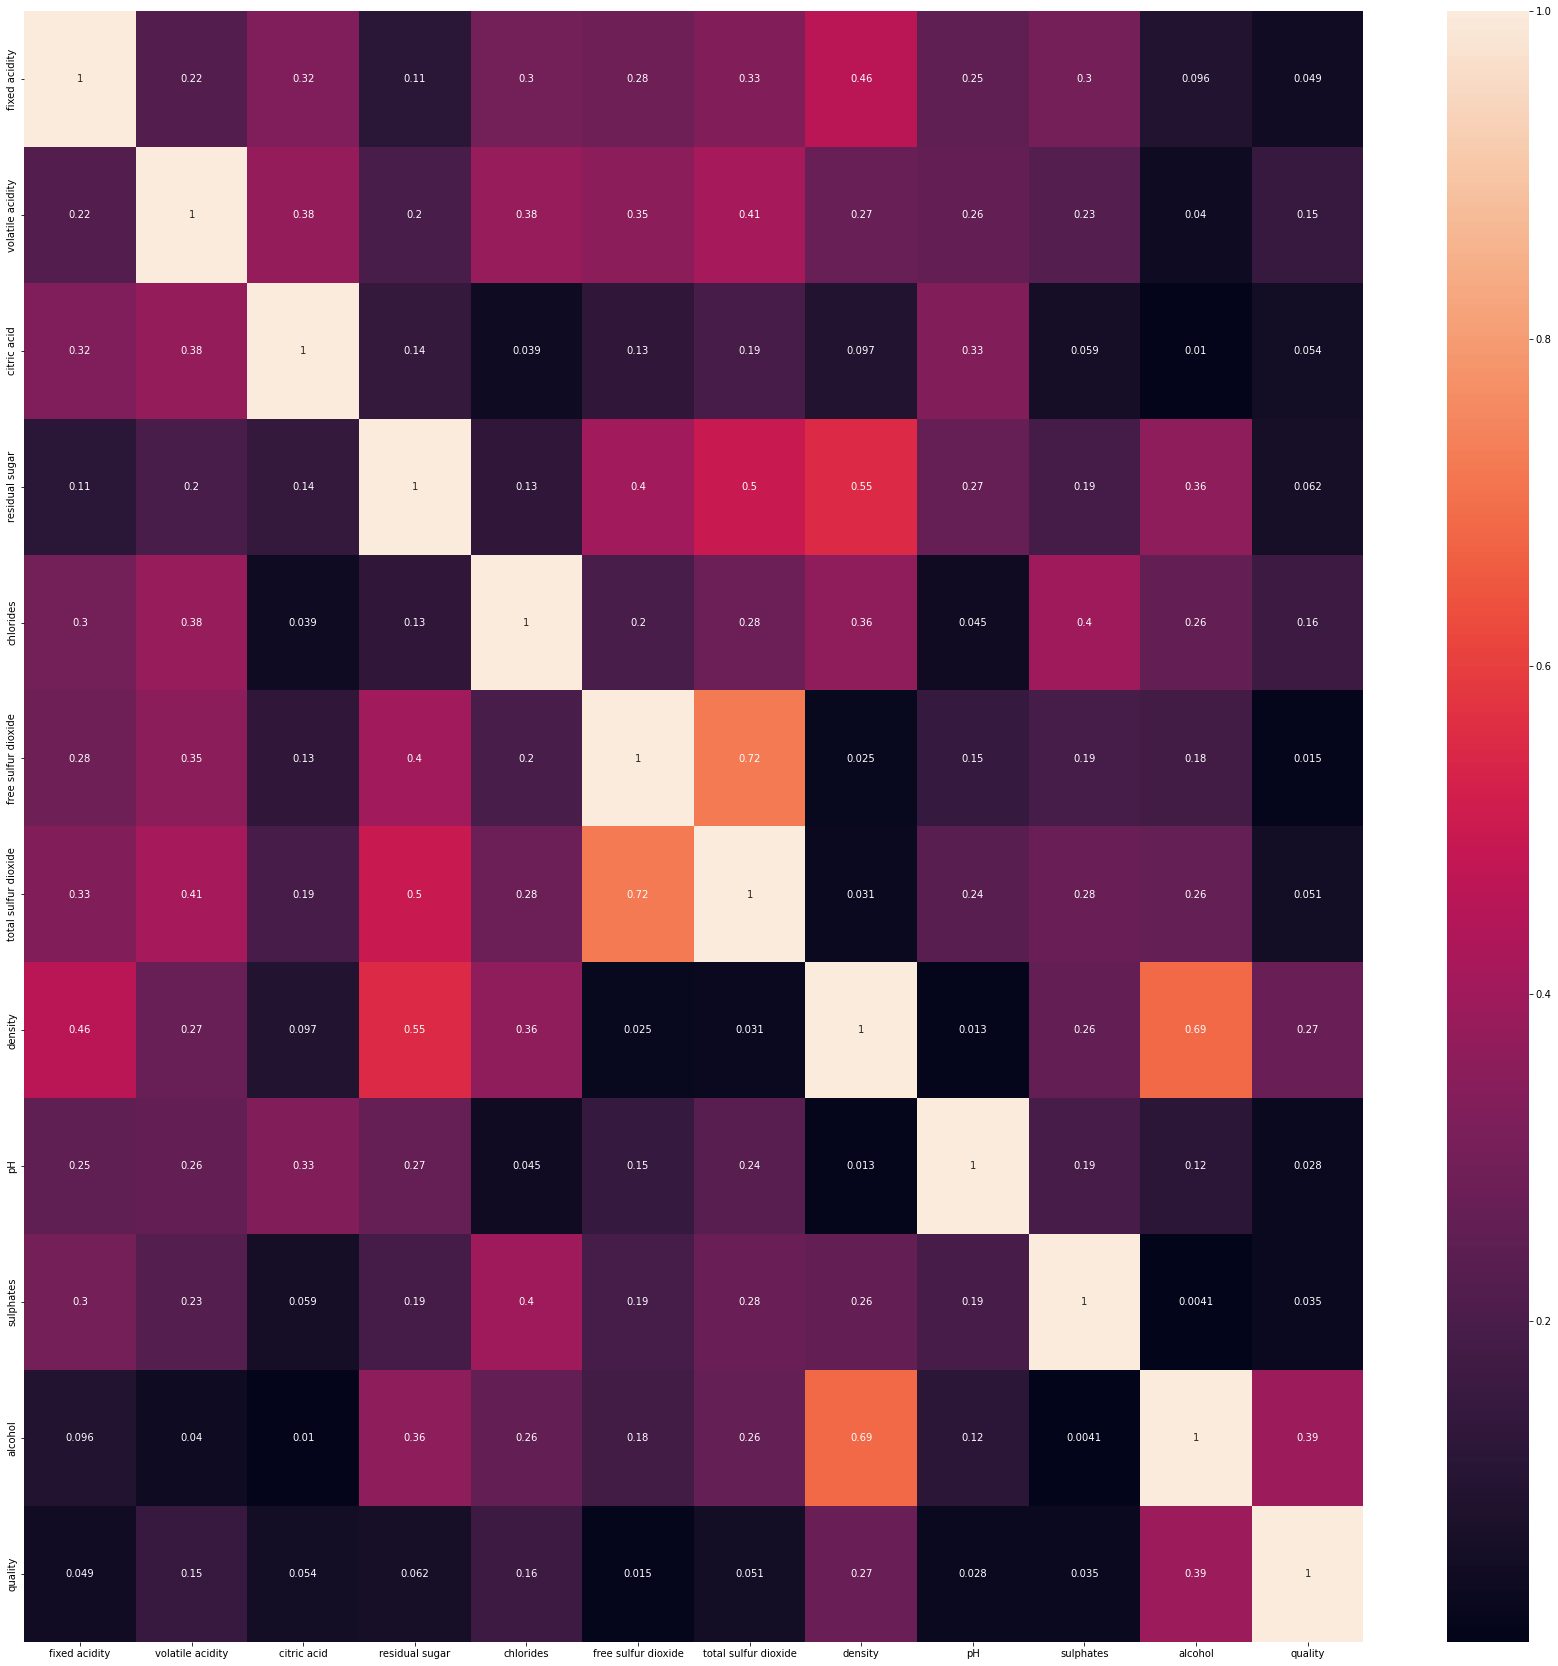

In [83]:
# plt.figure(figsize=(30, 20))
# sb.heatmap(wine_data.corr().abs(),  annot=True)
plt.figure(figsize=(30,30))
sb.heatmap(winedf.corr().abs(), annot=True)


In [99]:
model_1 = Sequential(
[
    layers.Dense(4, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_1.compile(
optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))




In [103]:
history_1 = model_1.fit(X_train_normal, y_train, epochs=100, callbacks=[scheduler])


Epoch 1/100
162/162 [==============================] - 0s 2ms/step - loss: 0.3697 - accuracy: 0.8294 - lr: 1.0000e-04
Epoch 2/100
162/162 [==============================] - 0s 2ms/step - loss: 0.3676 - accuracy: 0.8327 - lr: 1.1220e-04
Epoch 3/100
162/162 [==============================] - 0s 2ms/step - loss: 0.3667 - accuracy: 0.8327 - lr: 1.2589e-04
Epoch 4/100
162/162 [==============================] - 0s 2ms/step - loss: 0.3662 - accuracy: 0.8317 - lr: 1.4125e-04
Epoch 5/100
162/162 [==============================] - 0s 2ms/step - loss: 0.3656 - accuracy: 0.8323 - lr: 1.5849e-04
Epoch 6/100
162/162 [==============================] - 0s 2ms/step - loss: 0.3651 - accuracy: 0.8352 - lr: 1.7783e-04
Epoch 7/100
162/162 [==============================] - 0s 2ms/step - loss: 0.3646 - accuracy: 0.8337 - lr: 1.9953e-04
Epoch 8/100
162/162 [==============================] - 0s 2ms/step - loss: 0.3640 - accuracy: 0.8342 - lr: 2.2387e-04
Epoch 9/100
162/162 [==============================] - 0

162/162 [==============================] - 0s 2ms/step - loss: 0.4248 - accuracy: 0.8021 - lr: 0.3162
Epoch 72/100
162/162 [==============================] - 0s 2ms/step - loss: 0.4227 - accuracy: 0.8015 - lr: 0.3548
Epoch 73/100
162/162 [==============================] - 0s 2ms/step - loss: 0.4424 - accuracy: 0.8033 - lr: 0.3981
Epoch 74/100
162/162 [==============================] - 0s 2ms/step - loss: 0.4303 - accuracy: 0.8037 - lr: 0.4467
Epoch 75/100
162/162 [==============================] - 0s 2ms/step - loss: 0.4879 - accuracy: 0.8056 - lr: 0.5012
Epoch 76/100
162/162 [==============================] - 0s 2ms/step - loss: 0.4894 - accuracy: 0.8060 - lr: 0.5623
Epoch 77/100
162/162 [==============================] - 0s 2ms/step - loss: 0.4988 - accuracy: 0.8056 - lr: 0.6310
Epoch 78/100
162/162 [==============================] - 0s 2ms/step - loss: 0.5045 - accuracy: 0.8056 - lr: 0.7079
Epoch 79/100
162/162 [==============================] - 0s 2ms/step - loss: 0.5050 - accuracy

Text(0, 0.5, 'Loss')

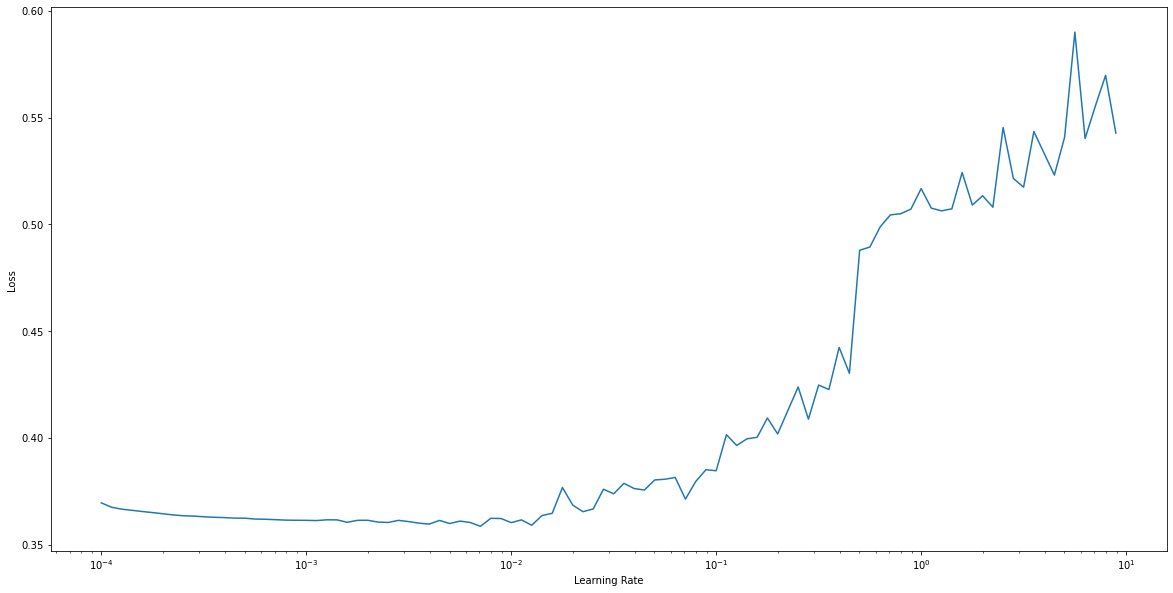

In [104]:
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(20, 10))
plt.semilogx(lrs, history_1.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")

In [106]:
mnist = keras.datasets.mnist
(X_train,y_train), (X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


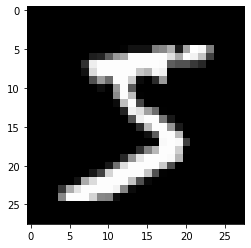

In [108]:
plt.imshow(X_train[0], cmap='gray')


In [118]:
# X_train = keras.utils.normalize(X_train, axis=1)
# X_test = keras.utils.normalize(X_test, axis=1)
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)


In [120]:
import numpy as np

np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [121]:
label_names = np.unique(y_test)

In [124]:
tf.random.set_seed(66)

model_img = Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_img.compile(
    optimizer = keras.optimizers.Adam(),
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']

)

history_img = model_img.fit(
    x = X_train,
    y = y_train,
    epochs=50,
    validation_data = (X_test,y_test)

)

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4407 - accuracy: 0.8730 - val_loss: 0.2655 - val_accuracy: 0.9230
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2407 - accuracy: 0.9291 - val_loss: 0.2235 - val_accuracy: 0.9317
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2035 - accuracy: 0.9400 - val_loss: 0.2081 - val_accuracy: 0.9384
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1784 - accuracy: 0.9466 - val_loss: 0.1835 - val_accuracy: 0.9429
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1616 - accuracy: 0.9517 - val_loss: 0.1682 - val_accuracy: 0.9494
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1471 - accuracy: 0.9552 - val_loss: 0.1648 - val_accuracy: 0.9486
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1369 - accuracy: 0.9581 - val_loss: 0.1544 - val_accuracy:

In [125]:
scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
history_2 = model_img.fit(x=X_train, y=y_train, epochs=50, callbacks=[scheduler], validation_data=(X_test, y_test))

In [126]:
y_prob = model_img.predict(X_test) 
y_prob[0]

313/313 [==============================] - 1s 2ms/step


array([1.1217490e-16, 7.4671384e-15, 2.0031006e-09, 9.8135741e-04,
       3.1499600e-17, 9.0935295e-09, 2.0905093e-27, 9.9901867e-01,
       1.1020814e-08, 3.0561132e-08], dtype=float32)

In [134]:
def predict(x):
    y = label_names[tf.argmax(y_prob[int(x)])]
    print('the output no. is ', str(y))

predict(2)

the output no. is  1
